# Lesson 6 Assignment - Advertising Sales Regression

## Author - Rodolfo Lerma

# Abstract

The analysis is divided in the following way:

### First look at the data
- **Data Cleaning**

### Analysis


- **First impressions**
    - Histogram of all the variables
    - Correlation plots
    - Scatter plots
    

- **Regression analysis**
    - Scaling Data
    - 1) TV - Regression
    - 2) Radio - Regression
    - 3) Newspaper - Regression
    - 4) Multivariable model
    
    
### Summary/Conclusions.



In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
import seaborn as sns

In [2]:
# Load data
filename = 'Advertising.csv'
#filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)

# First look at the data

In [3]:
print(ad_data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [4]:
ad_data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the variables are numeric (`float64`)

#### Shape of the data frame

In [5]:
print(ad_data.shape)

(200, 4)


**Summary:**
- The data set contains 200 rows
- The data set has 4 variables (columns)
- All the 4 variables are numeric (`float64`)

#### Descriptive statistics of the variables in the data frame

In [6]:
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Cleaning of data

In [7]:
#Removing outliers based on Price:
LimitHi = np.mean(ad_data['newspaper']) + 2*np.std(ad_data['newspaper']) #Higher Limit for each of the numeric attributes
LimitLo = np.mean(ad_data['newspaper']) - 2*np.std(ad_data['newspaper']) #Lower Limit for each of the numeric attributes
FlagBad = (ad_data['newspaper'] < LimitLo) | (ad_data['newspaper'] > LimitHi) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
ad_data = ad_data.loc[FlagGood]

print(ad_data.shape)

(192, 4)


Based on the table above it seems that there is one variable with *outliers*: `newspaper`. 

Those values outside (2)SIGMA would be removed. It is possible to see that 8 data points were removed, which is acceptable given the amount of data points we have.

# Analysis

## First impressions

### Histogram of all the variables

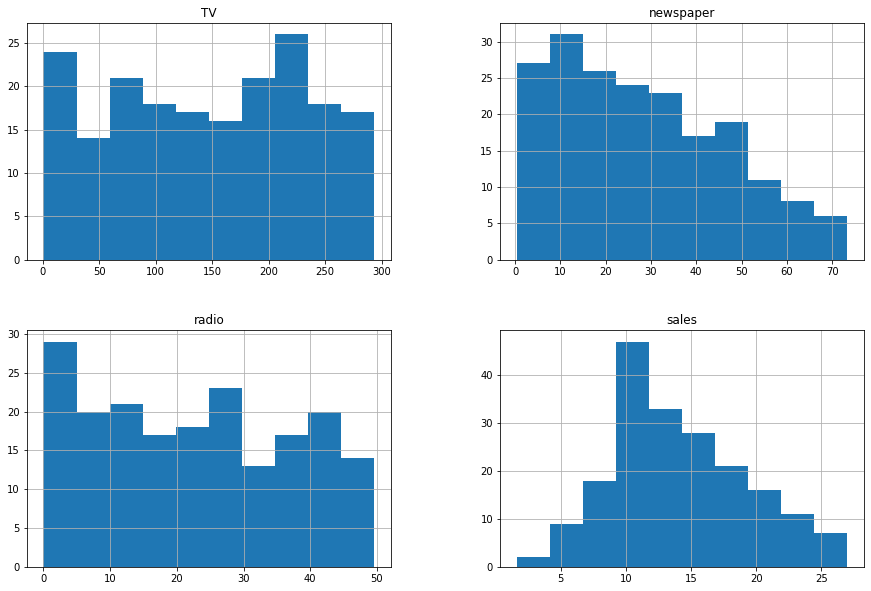

In [8]:
ad_data.hist(figsize = (15,10))
plt.show()

#### Distribution notes:

### Correlation plots

In this part of the analysis a quick correlation analysis is provided to spot any correlated values that might lead to useful insights from the data.

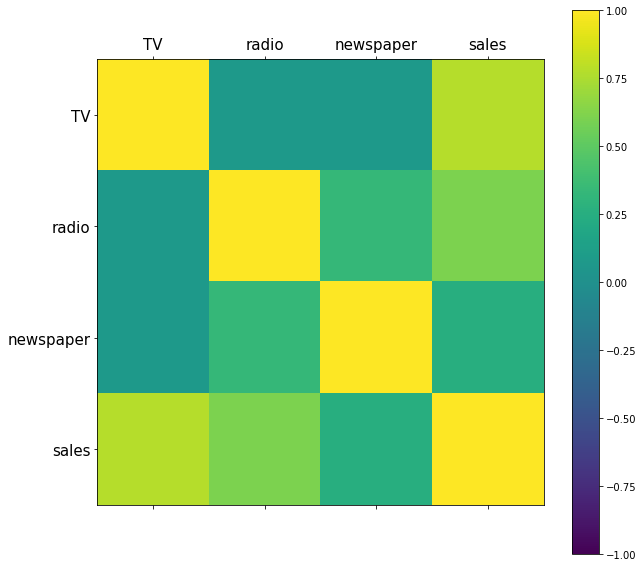

In [9]:
correlations = ad_data.corr()
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ad_data, fontsize = 15)
ax.set_yticklabels(ad_data, fontsize = 15)
plt.show()

A quick look at the data shows that there is a correlation between `sales` and the other 3 variables, being `TV` the strongest one, followed by `radio` and last `newspaper`.

### Scatter plots

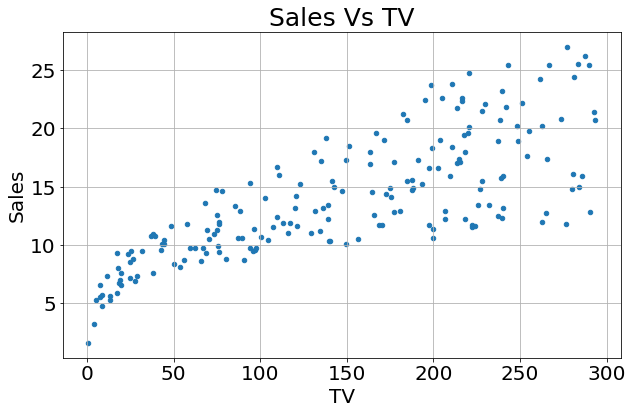

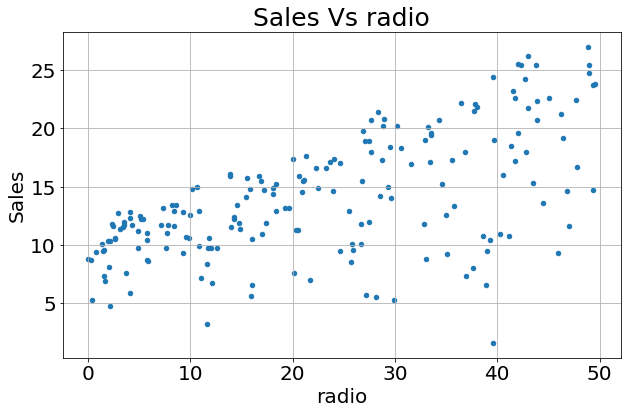

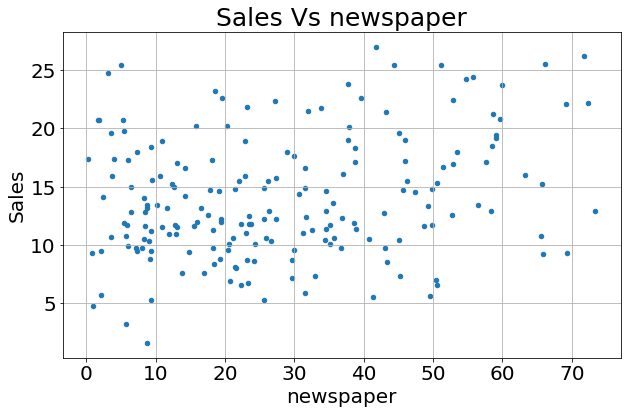

In [10]:
columns = ['TV', 'radio', 'newspaper']

for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(10, 6)).gca() # define axis
    ad_data.plot.scatter(x = i, y = 'sales', ax = ax)
    ax.set_title('Sales Vs ' + i, fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Sales', fontsize = 20)# Set text for y axis
    ax.set_xlabel(i, fontsize = 20)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)
    ax.grid(True)
    plt.show()

From the plots above it is possible to see that some of the attributes show some correlation with `sales`, mainly `TV` & `radio`, while `newspaper` is not showing a very big correlation.

*It is possible to notice that the dispersion seems to be increasing as the attribute value increase*

## Regression analysis

### Scaling Data

In [11]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [12]:
# Add scaled x to data frame
ad_data['TV_scale'] = scale(ad_data['TV'])
ad_data['radio_scale'] = scale(ad_data['radio'])
ad_data['newspaper_scale'] = scale(ad_data['newspaper'])

### 1) TV - Regression

In [13]:
TV_scaled = ad_data['TV_scale']
y_output = ad_data['sales']
ols_model_TV = sm.ols(formula = 'sales ~ TV_scale', data = ad_data)
results_TV = ols_model_TV.fit()
# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_TV.params.Intercept))
print('Slope : {0:.5f}'.format(results_TV.params.TV_scale))

Intercept: 13.98750
Slope : 4.04883


In [14]:
ad_data['TV'].mean()

147.05885416666663

**'TV': advertising dollars spent on TV ads for a single product in a given market.**

From this values and the plot that we can see below we can get the following insights:


- When the TV Scaled value is zero, meaning when dollars spent on TV advertising is around 147 dollars (mean value of TV spendings)we get around 13.98 ~ 14 sales.


- For every increase of TV Scaled by 1 we expect that `sales` will go up by 4.04. Which translated to actual TV spendings means (accounting for mean and std dev) for every dollar spend in TV adverstising we get 0.048 `sales`.

In [15]:
print('\nScaled: SSE, SST, SSR, and RMSE for TV:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results_TV.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results_TV.ssr))
print('RMSE: {}'.format(np.sqrt(results_TV.mse_model)))
print('R2: {}'.format(results_TV.rsquared))
y_pred_TV = ols_model_TV.fit().predict(TV_scaled)


Scaled: SSE, SST, SSR, and RMSE for TV:
SSE: 3147.4537825495463
SST: 5177.049999999999
SSR: 2029.5962174504527
RMSE: 56.10217270792234
R2: 0.6079627939752459


It is important to notice the Rsquared value is **0.608**

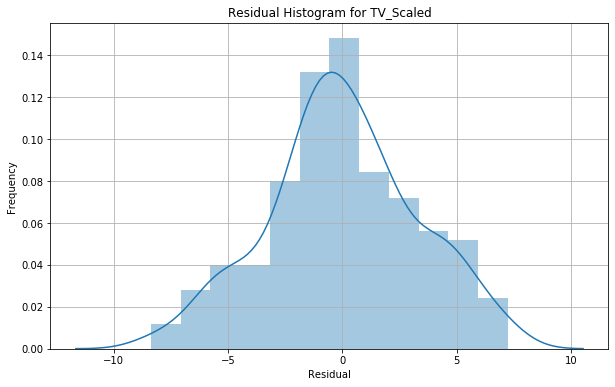

In [16]:
#Plots
def histograms(a,b):
    plt.figure(figsize=(10, 6)).gca()
    sns.distplot(a.resid, hist=True)
    plt.grid(True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram for ' + b)

histograms(results_TV, 'TV_Scaled')

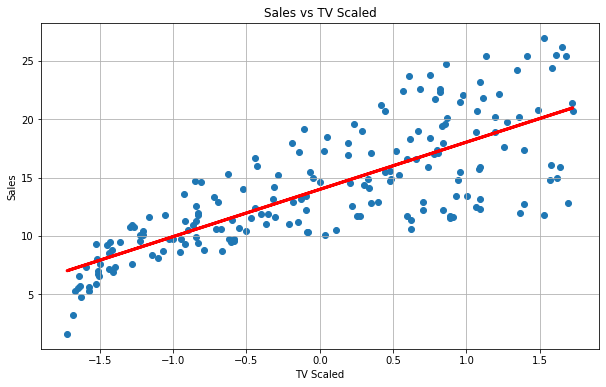

In [17]:
def scatters(a,b,c,d):
    plt.figure(figsize=(10, 6)).gca()
    plt.scatter(a, b)
    plt.plot(a, c, linewidth=3, color = 'red')
    plt.grid(True)
    plt.xlabel(d)
    plt.ylabel('Sales')
    plt.title('Sales vs ' + d)

scatters(TV_scaled, y_output, y_pred_TV, 'TV Scaled')

**Summary of Regression:**

Rsquared Value of: **0.608**

Slope: **4.04**

Intersection: **13.98**

### 2) Radio - Regression

In [18]:
radio_scaled = ad_data['radio_scale']

ols_model_radio = sm.ols(formula = 'sales ~ radio_scale', data = ad_data)
results_radio = ols_model_radio.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_radio.params.Intercept))
print('Slope : {0:.5f}'.format(results_radio.params.radio_scale))

Intercept: 13.98750
Slope : 3.14022


In [19]:
ad_data['radio'].mean()

22.80885416666668

**'radio': advertising dollars spent radio ads.**

From this values and the plot that we can see below we can get the following insights:


- When the Radio Scaled value is zero (Radio Scaled equal to zero is the same as Radio equals to the mean), meaning when dollars spent on Radio advertising are around $22.8 we get around 13.98 ~ 14 sales.


- For every increase of Radio Scaled by 1 we expect that `sales` will go up by 3.14. Which translated to actual Radio spendings means (accounting for mean and std dev) for every dollar spend in Radio adverstising we get 0.213 `sales`.

In [20]:
print('\nScaled: SSE, SST, SSR, and RMSE for Radio:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results_radio.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results_radio.ssr))
print('RMSE: {}'.format(np.sqrt(results_radio.mse_model)))
print('R2: {}'.format(results_radio.rsquared))

y_pred_radio = ols_model_radio.fit().predict(radio_scaled)


Scaled: SSE, SST, SSR, and RMSE for Radio:
SSE: 1893.309992237001
SST: 5177.049999999999
SSR: 3283.740007762998
RMSE: 43.51218211302441
R2: 0.365712131858298


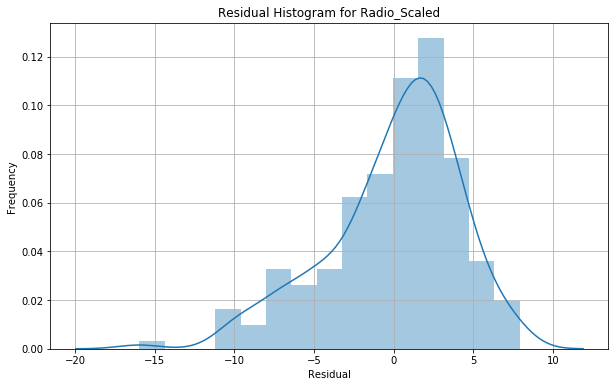

In [21]:
histograms(results_radio, 'Radio_Scaled')

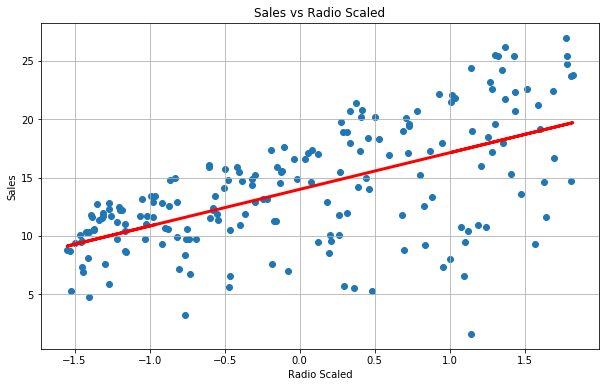

In [22]:
scatters(radio_scaled, y_output, y_pred_radio, 'Radio Scaled')

It is possible to see that the residuals values distribution is skewed to the right, which is possible to see in the scatter plot as well since our regression line seems to be closer to the upper points than the lower section.

**Summary of Regression:**

Rsquared Value of: **0.366**

Slope: **3.14**

Intersection: **13.98**

### 3) Newspaper - Regression

In [23]:
newspaper_scaled = ad_data['newspaper_scale']

ols_model_newspaper = sm.ols(formula = 'sales ~ newspaper_scale', data = ad_data)
results_newspaper = ols_model_newspaper.fit()

# Get slope (m) and y-intercept (b)
print('Intercept: {0:.5f}'.format(results_newspaper.params.Intercept))
print('Slope : {0:.5f}'.format(results_newspaper.params.newspaper_scale))

Intercept: 13.98750
Slope : 1.32551


In [24]:
ad_data['newspaper'].mean()

28.217187499999998

**'newspaper': advertising dollars spent newspaper ads.**

From this values and the plot that we can see below we can get the following insights:


- When the Newspaper Scaled value is zero (Newspaper Scaled equal to zero is the same as Newspaper equals to the mean), meaning when dollars spent on Newspaper advertising are around $22.21 we get around 13.98 ~ 14 sales.


- For every increase of Newspaper Scaled by 1 we expect that `sales` will go up by 1.325. Which translated to actual Newspaper spendings means (accounting for mean and std dev) for every dollar spend in Newspaper adverstising we get 0.0711 `sales`.

In [25]:
print('\nScaled: SSE, SST, SSR, and RMSE for Newspaper:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results_newspaper.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results_newspaper.ssr))
print('RMSE: {}'.format(np.sqrt(results_newspaper.mse_model)))
print('R2: {}'.format(results_newspaper.rsquared))

y_pred_newspaper = ols_model_newspaper.fit().predict(newspaper_scaled)


Scaled: SSE, SST, SSR, and RMSE for Newspaper:
SSE: 337.3387870327033
SST: 5177.049999999999
SSR: 4839.711212967296
RMSE: 18.366784885567295
R2: 0.06516042669719302


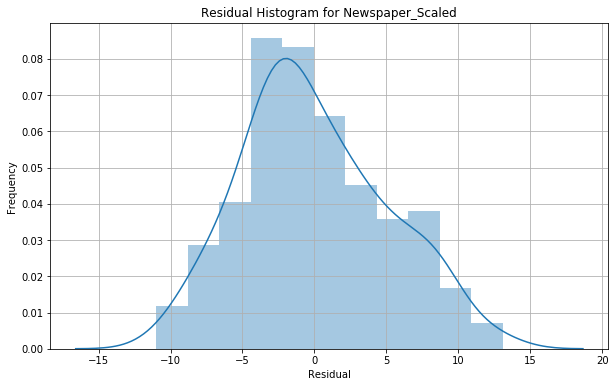

In [26]:
histograms(results_newspaper, 'Newspaper_Scaled')

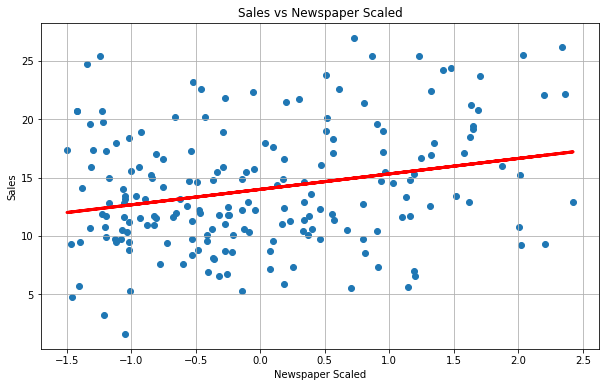

In [27]:
scatters(newspaper_scaled, y_output, y_pred_newspaper, 'Newspaper Scaled')

From the data and plots above it is possible to see that the data shows a pretty low slope value, which could be translated as: investing in Newspaper ads is not providing a lot of return in `sales`, but also the dispersion of the data is big enough that the difference betweens predictions and actual values is kind of big.

**Summary of Regression:**

Rsquared Value of: **0.065**

Slope: **1.325**

Intersection: **13.98**

### 4) Combination (TV, Radio & Newspaper) - Regression

In [28]:
#Getting the variables into a list of lists)
attributes = ad_data[['TV_scale', 'radio_scale', 'newspaper_scale']]
y_output = ad_data['sales']

In [29]:
# Scale the data. We will use the scaler later
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(attributes)
attributes = scaler.transform(attributes)

In [30]:
#Getting the regression using sklearn
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Fit the data(train the model)
multi_model = regression_model.fit(attributes, y_output)

# Predict
y_predicted = multi_model.predict(attributes)

print('Intercept: \n', multi_model.intercept_) # pull out intercept
print('Coefficients: \n', multi_model.coef_) # pull out coeffeicients

Intercept: 
 13.987500000000002
Coefficients: 
 [3.80904914 2.78322268 0.12099912]


In [31]:
#Getting the regression with statsmodels
import statsmodels.api as sm

Attributes = sm.add_constant(attributes) # adding a constant
multi_model = sm.OLS(y_output, Attributes).fit()

# Get slope (m) and y-intercept (b)
print('Intercept/Constant & Coefficients : {}'.format(multi_model.params))

Intercept/Constant & Coefficients : const    13.987500
x1        3.809049
x2        2.783223
x3        0.120999
dtype: float64


In [32]:
print('\nScaled: SSE, SST, SSR, and RMSE for All the Attributes:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - multi_model.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(multi_model.ssr))
print('RMSE: {}'.format(np.sqrt(multi_model.mse_model)))
print('R2: {}'.format(multi_model.rsquared))

predictions = multi_model.predict(Attributes) 


Scaled: SSE, SST, SSR, and RMSE for All the Attributes:
SSE: 4669.919219056159
SST: 5177.049999999999
SSR: 507.13078094384
RMSE: 39.45427403571616
R2: 0.9020425182403415


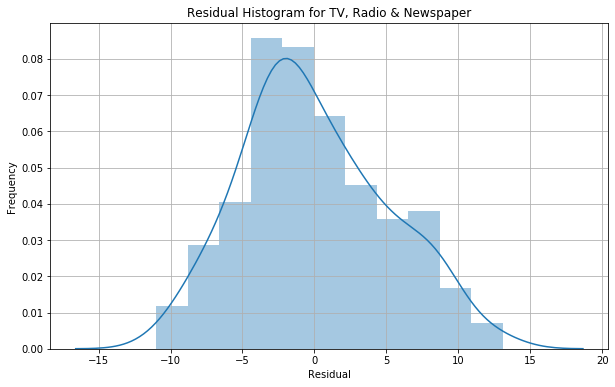

In [33]:
histograms(results_newspaper, 'TV, Radio & Newspaper')

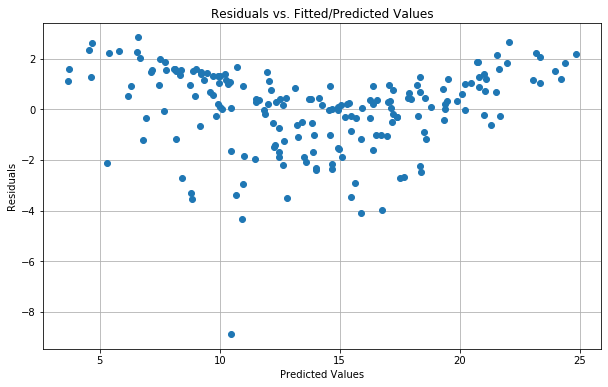

In [34]:
# Residuals vs Fitted Values
residuals = multi_model.resid # outlier_linear = name of linear model on our dataset
plt.figure(figsize=(10, 6)).gca()
plt.plot(predictions, residuals, 'o') # plotting predictions from fit model vs residuals
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted/Predicted Values')
plt.grid(True)
plt.show()

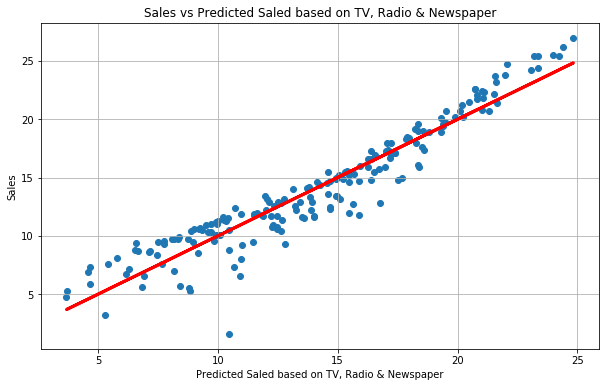

In [35]:
scatters(predictions, y_output, predictions, 'Predicted Saled based on TV, Radio & Newspaper')

**Summary of Regression:**

Rsquared Value of: **0.902**

RMSE: **2.84* 

Partial Slopes:
TV **3.809**
Radio **2.783**
Newspaper **0.122**

Intersection: **13.98**

# Summary/Conclusions.

From the analysis above it is possible to notice the following:

**'TV': advertising dollars spent on TV ads for a single product in a given market.**
From this values and the plot that we can see below we can get the following insights:
- When the TV Scaled value is zero, meaning when dollars spent on TV advertising is around 147 dollars (mean value of TV spendings)we get around 13.98 ~ 14 sales.
- For every increase of TV Scaled by 1 we expect that `sales` will go up by 4.04. Which translated to actual TV spendings means (accounting for mean and std dev) for every dollar spend in TV adverstising we get 0.048 `sales`.

**'radio': advertising dollars spent radio ads.**
From this values and the plot that we can see below we can get the following insights:
- When the Radio Scaled value is zero (Radio Scaled equal to zero is the same as Radio equals to the mean), meaning when dollars spent on Radio advertising are around $22.8 we get around 13.98 ~ 14 sales.
- For every increase of Radio Scaled by 1 we expect that `sales` will go up by 3.14. Which translated to actual Radio spendings means (accounting for mean and std dev) for every dollar spend in Radio adverstising we get 0.213 `sales`.

**'newspaper': advertising dollars spent newspaper ads.**
From this values and the plot that we can see below we can get the following insights:
- When the Newspaper Scaled value is zero (Newspaper Scaled equal to zero is the same as Newspaper equals to the mean), meaning when dollars spent on Newspaper advertising are around $22.21 we get around 13.98 ~ 14 sales.
- For every increase of Newspaper Scaled by 1 we expect that `sales` will go up by 1.325. Which translated to actual Newspaper spendings means (accounting for mean and std dev) for every dollar spend in Newspaper adverstising we get 0.0711 `sales`.

**Model including all 3 predictors**

It is possible to see that the regression model that includes all 3 attributes (predictors) does much better in characterizing/predicting the `sales` values with a Rsq of 0.902 compared to the previous ones: TV Rsq: 0.608, Radio Rsq: 0.36 & Newspaper Rsq: 0.065.

**Sum of Squared Residuals (SSR)**: This is the value that the method of least squares was able to minimize to with the best fit line.

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \sqrt{\frac{{SSR}}{n}}$$

The RMSE is $$(39.454/\sqrt {n}) = 2.84$$, which is much slower than the one for the TV, Radio, Newspaper regression models.

Also we can see that from the Multi-variable model we get the following 3 partial slopes (coefficients):

TV **3.809**

Radio **2.783**

Newspaper **0.122**

Which give us a clear picture of the contribution of each of the ad methods to the `sales` obvserved, being the TV one the most efficient followed by Radio and last Newspaper.